# Proyek Analisis Data: Bike Sharing Dataset

- **Nama:** M. Rezky Revansyah Suprihono
- **Email:** a006ybm263@devacademy.id
- **ID Dicoding:** a006ybm263


## Menentukan Pertanyaan Bisnis


- Bagaimana distribusi penyewaan tertinggi dan terendah dalam satu musim bila diukur dengan jam serta hari?
- Bagaimana distribusi penyewaan sepeda antara weekdays dan weekend?
- Bagaimana perbedaan pola penyewaan sepeda per jam antara kondisi cuaca cerah (clear weather) dan cuaca berkabut (mist/fog)? Apakah terdapat perbedaan signifikan dalam pola penyewaan sepeda pada kedua kondisi cuaca tersebut?


## Import Semua Packages/Library yang Digunakan


In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling


### Gathering Data


Load Tabel Day


In [44]:
# Membaca file CSV dari lokasi yang ditentukan
day_df = pd.read_csv("D:\laskarAI\Analisis Data New\data\day.csv") 

# Menampilkan 5 baris pertama dari DataFrame
day_df.head()

<>:2: SyntaxWarning: invalid escape sequence '\l'
<>:2: SyntaxWarning: invalid escape sequence '\l'
C:\Users\Acer Nitro 5\AppData\Local\Temp\ipykernel_20132\782946436.py:2: SyntaxWarning: invalid escape sequence '\l'
  day_df = pd.read_csv("D:\laskarAI\Analisis Data New\data\day.csv")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Load Tabel Hour


In [45]:
# Membaca file CSV dari lokasi yang ditentukan
hour_df = pd.read_csv("D:\laskarAI\Analisis Data New\data\hour.csv")

# Menampilkan 5 baris pertama dari DataFrame
hour_df.head()

<>:2: SyntaxWarning: invalid escape sequence '\l'
<>:2: SyntaxWarning: invalid escape sequence '\l'
C:\Users\Acer Nitro 5\AppData\Local\Temp\ipykernel_20132\1743248090.py:2: SyntaxWarning: invalid escape sequence '\l'
  hour_df = pd.read_csv("D:\laskarAI\Analisis Data New\data\hour.csv")


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**

- Penyewaan Meningkat Saat Weekday
- Jam 0 hingga jam 4 menunjukkan jumlah penyewaan sepeda yang masih rendah.


### Assessing Data


**Menilai Data day_df**


In [46]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Mengecek missing value


In [47]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Mengecek duplikasi data


In [48]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


Menampilkan ringkasan parameter statistik


In [49]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Menilai data hour_df**


In [50]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Mengecek missing value


In [51]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Mengecek jumlah duplikasi


In [52]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


Menampilkan ringkasan parameter statistik


In [53]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**

- Pada data day terdapat tipe data yang tidak sesuai, yaitu dteday yang seharusnya bertipe data **datetime** bukan **_object_**
- Pada data hour terdapat tipe data yang tidak sesuai, yaitu dteday yang seharusnya bertipe data **datetime** bukan **_object_**
- Selebihnya terlihat normal dan tidak ada masalah


### Cleaning Data


In [54]:
# Konversi dteday menjadi datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

# Cek kembali tipe data
print(day_df.dtypes)

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


In [55]:
# Konversi dteday menjadi datetime
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

# Cek kembali tipe data
print(hour_df.dtypes)

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


**Insight:**

- Data pada day_df telah diberishkan dan sudah terlihat berubah menjadi datetime
- Data pada hour_df telah diberishkan dan sudah terlihat berubah menjadi datetime


## Exploratory Data Analysis (EDA)


### Eksplorasi Data day_df


In [56]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


1. Jumlah, rata-rata, maksimum, dan minimum penyewaan per musim (season)


In [57]:
day_df.groupby(by="season").agg({
      "cnt": ["sum", "mean", "max", "min"]
})

cnt                         
            sum         mean   max   min
season                                  
1        471348  2604.132597  7836   431
2        918589  4992.331522  8362   795
3       1061129  5644.303191  8714  1115
4        841613  4728.162921  8555    22

2. Jumlah penyewaan berdasarkan hari dalam minggu (weekday)


In [58]:
day_df.groupby(by="weekday").agg({
      "cnt": ["sum", "mean", "max", "min"]
      }).sort_values(by=("cnt", "sum"), ascending=False)

cnt                         
            sum         mean   max   min
weekday                                 
5        487790  4690.288462  8362  1167
4        485395  4667.259615  7804   431
6        477807  4550.542857  8714   627
3        473048  4548.538462  8173   441
2        469109  4510.663462  7767   683
1        455503  4338.123810  7525    22
0        444027  4228.828571  8227   605

3. Jumlah penyewaan berdasarkan hari kerja atau bukan (workingday)


In [59]:
day_df.groupby(by="workingday").agg({
      "cnt": ["sum", "mean", "max", "min"]
      }).rename(index={0: "Weekend/Holiday", 1: "Working Day"})

cnt                        
                     sum         mean   max  min
workingday                                      
Weekend/Holiday  1000269  4330.168831  8714  605
Working Day      2292410  4584.820000  8362   22

4. Jumlah penyewaan berdasarkan hari libur (holiday)


In [60]:
day_df.groupby(by="holiday").agg({
      "cnt": ["sum", "mean", "max", "min"]
      }).rename(index={0: "Bukan Libur", 1: "Hari Libur"})

cnt                         
                 sum         mean   max   min
holiday                                      
Bukan Libur  3214244  4527.104225  8714    22
Hari Libur     78435  3735.000000  7403  1000

5. Korelasi antar variabel


In [61]:
day_df.corr(numeric_only=True)

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
season,0.412224,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
yr,0.866025,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.496702,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,0.016145,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.000016,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,-0.004337,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,-0.021477,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.150580,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.152638,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066


6. Hari dengan penyewaan terbanyak dan tersedikit


In [62]:
day_df[day_df['cnt'] == day_df['cnt'].max()][['dteday', 'cnt']]

,dteday,cnt
623,2012-09-15,8714


In [63]:
day_df[day_df['cnt'] == day_df['cnt'].min()][['dteday', 'cnt']]

,dteday,cnt
667,2012-10-29,22


**Insight:**

- Musim Gugur (season 3) memiliki jumlah penyewaan terbanyak secara keseluruhan
- Musim Semi (season 1) memiliki jumlah penyewaan paling sedikit
- Tidak ada perbedaan ekstrem antar hari kerja, namun akhir pekan cenderung sedikit lebih rendah.
- Hari kerja memiliki penyewaan lebih banyak dibanding akhir pekan/holiday.
- Semakin bagus cuacanya (hangat, tidak berangin, tidak lembap), semakin banyak penyewaan sepeda.
- 15 September 2012 dengan 8.714 sepeda
- 29 Oktober 2012 dengan hanya 22 sepeda


### Eksplorasi Data hour_df


In [64]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


1. Jumlah, rata-rata, maksimum, minimum penyewaan per jam (hr)


In [65]:
hour_df.groupby(by="hr").agg({
      "cnt": ["sum", "mean", "max", "min"]
      }).sort_values(by=("cnt", "sum"), ascending=False)

cnt                     
       sum        mean  max min
hr                             
17  336860  461.452055  976  15
18  309772  425.510989  977  23
8   261001  359.011004  839   5
16  227748  311.983562  783  11
19  226789  311.523352  743  11
13  184919  253.661180  760  11
12  184414  253.315934  776   3
15  183149  251.233196  750   7
14  175652  240.949246  750  12
20  164550  226.030220  567  11
9   159438  219.309491  426  14
7   154171  212.064649  596   1
11  151320  208.143054  663  10
10  126257  173.668501  539   8
21  125445  172.314560  584   6
22   95612  131.335165  502   9
23   63941   87.831044  256   2
6    55132   76.044138  213   1
0    39130   53.898072  283   2
1    24164   33.375691  168   1
2    16352   22.869930  132   1
5    14261   19.889819   66   1
3     8174   11.727403   79   1
4     4428    6.352941   28   1

2. Jumlah penyewaan per musim


In [66]:
hour_df.groupby(by="season").agg({
      "cnt": ["sum", "mean", "max", "min"]
      })

cnt                     
            sum        mean  max min
season                              
1        471348  111.114569  801   1
2        918589  208.344069  957   1
3       1061129  236.016237  977   1
4        841613  198.868856  967   1

3. Penyewaan per kombinasi musim dan jam


In [67]:
hour_df.groupby(by=["season", "hr"]).agg({
      "cnt": ["mean", "max", "min"]
      }).unstack()

cnt                                                        \
             mean                                                         
hr             0          1          2          3         4          5    
season                                                                    
1       27.404494  18.140449  12.794118   7.102564  3.181818  10.701754   
2       56.842391  35.222826  23.380435  11.450549  6.211111  19.169399   
3       73.914439  43.720430  30.731183  15.752688  8.240642  26.454545   
4       56.333333  35.920455  23.765714  11.861272  7.267045  22.590909   

                                                        ...                  \
                                                        ... min               
hr              6           7           8           9   ...  14  15  16  17   
season                                                  ...                   
1        40.792135  115.391061  235.167598  147.016760  ...  12   7  11  25   
2        79.070652  221.483696  380.135870  233.983696  ...  15  25  33  15   
3       101.315508  276.595745  421.297872  254.930851  ...  23  30  24  16   
4        81.681818  231.607955  396.346591  239.443182  ...  24  30  22  31   

                                
                                
hr      18  19  20  21  22  23  
season                          
1       23  11  11   7   9   2  
2       38  35  35  11  13  12  
3       68  52  58  38  29  20  
4       37  28  26   6  13  13  

[4 rows x 72 columns]

4. Penyewaan berdasarkan kondisi cuaca (weathersit)


In [68]:
hour_df.groupby(by="weathersit").agg({
      "cnt": ["sum", "mean", "max", "min"]
      }).rename(index={1: "Cerah", 2: "Berkabut", 3: "Hujan/Salju", 4: "Hujan Lebat"})

cnt                     
                 sum        mean  max min
weathersit                               
Cerah        2338173  204.869272  977   1
Berkabut      795952  175.165493  957   1
Hujan/Salju   158331  111.579281  891   1
Hujan Lebat      223   74.333333  164  23

5. Penyewaan per jam hanya pada cuaca cerah & berkabut


In [69]:
filtered = hour_df[hour_df["weathersit"].isin([1, 2])]
filtered.groupby(["hr", "weathersit"]).agg({
    "cnt": "mean"
    }).unstack()

cnt            
weathersit           1           2
hr                                
0            59.161554   47.232432
1            34.395918   35.541899
2            22.817992   25.491713
3            11.995604   12.452128
4             6.413567    6.721311
5            20.414687   20.141463
6            79.165563   74.612903
7           218.742664  224.733645
8           361.359091  391.283843
9           226.391608  226.848361
10          192.470721  159.469565
11          234.284116  182.678112
12          281.975169  225.869565
13          283.388769  225.855769
14          269.464135  208.654639
15          275.228866  227.814607
16          335.745098  299.640000
17          500.429980  422.904762
18          458.440000  390.417722
19          336.096267  282.025000
20          244.869231  204.542857
21          186.826511  151.816456
22          142.601179  116.823171
23           93.981707   85.171598

6. Hari dan jam dengan penyewaan tertinggi & terendah per musim


In [70]:
max_idx = hour_df.groupby("season")["cnt"].idxmax()

In [71]:
min_idx = hour_df.groupby("season")["cnt"].idxmin()


In [72]:
max_season = hour_df.loc[max_idx, ["season", "dteday", "hr", "cnt"]].rename(columns={
      "dteday": "dteday_max",
      "hr": "hr_max",
      "cnt": "cnt_max"
})

In [73]:
min_season = hour_df.loc[min_idx, ["season", "dteday", "hr", "cnt"]].rename(columns={
      "dteday": "dteday_min",
      "hr": "hr_min",
      "cnt": "cnt_min"
})

In [74]:
season_summary = pd.merge(max_season, min_season, on="season")

In [75]:
print(season_summary)

   season dteday_max  hr_max  cnt_max dteday_min  hr_min  cnt_min
0       1 2012-03-19      18      801 2011-01-01       4        1
1       2 2012-03-23      17      957 2011-03-21       3        1
2       3 2012-09-12      18      977 2011-07-03       5        1
3       4 2012-09-25      17      967 2011-10-18       3        1


### Gabungan Data day_df dan hour_df


1. Perbandingan pola weekday vs weekend per jam


In [76]:
hour_df['day_type'] = hour_df['workingday'].apply(lambda x: 'Weekday' if x == 1 else 'Weekend')
hour_df.groupby(["hr", "day_type"])["cnt"].mean().unstack()

day_type,Weekday,Weekend
hr,,
0,36.786290,90.800000
1,16.552632,69.508696
2,8.683778,53.171053
3,4.942553,25.775330
4,5.429787,8.264317
5,24.913131,8.689189
6,102.500000,18.742358
7,290.612903,43.406926
8,477.006048,105.653680


2. Tren penyewaan harian berdasarkan tahun


In [77]:
day_df.groupby(by="yr").agg({
    "cnt": ["sum", "mean"]
}).rename(index={0: "2011", 1: "2012"})

cnt             
          sum         mean
yr                        
2011  1243103  3405.761644
2012  2049576  5599.934426

## Visualization & Explanatory Analysis


### Pertanyaan 1: Bagaimana distribusi penyewaan tertinggi dan terendah dalam satu musim bila diukur dengan jam serta hari?


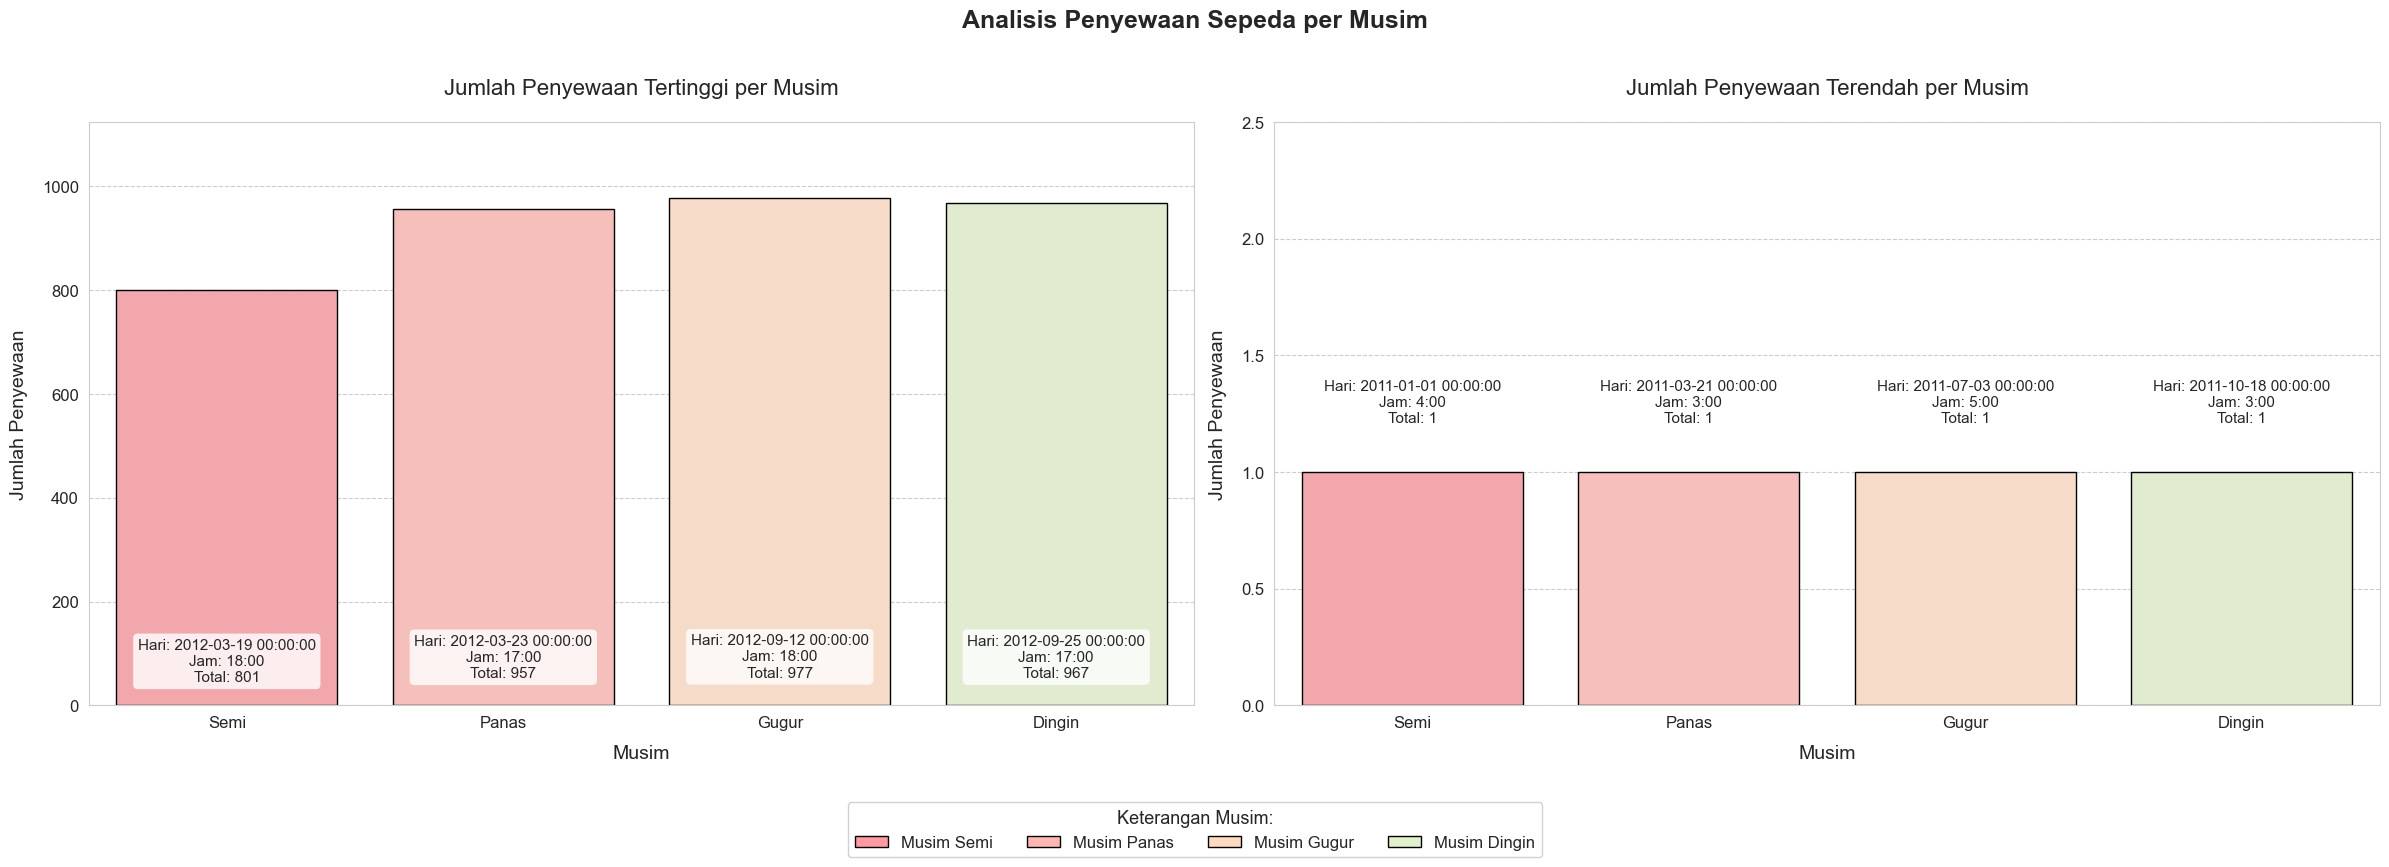

In [78]:
# Setup style yang lebih profesional
sns.set_style("whitegrid", {'grid.linestyle': '--', 'grid.alpha': 0.4})
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']

# Warna khusus per musim dengan gradasi yang lebih harmonis
season_colors = ["#FF9AA2", "#FFB7B2", "#FFDAC1", "#E2F0CB"]  # Warna pastel

# Mapping musim
season_labels = {1: "Semi", 2: "Panas", 3: "Gugur", 4: "Dingin"}
season_summary["Musim"] = season_summary["season"].map(season_labels)

# Buat figure dengan layout yang lebih baik
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(24, 8))
fig.suptitle('Analisis Penyewaan Sepeda per Musim', y=1.02, fontsize=18, fontweight='bold')

# Plot penyewaan TERTINGGI - PERBAIKAN DI SINI
sns.barplot(
    data=season_summary,
    x="Musim",
    y="cnt_max",
    hue="Musim",  # Tambahkan hue
    palette=season_colors,
    ax=ax1,
    edgecolor='black',
    linewidth=1,
    legend=False  # Nonaktifkan legend
)
ax1.set_title("Jumlah Penyewaan Tertinggi per Musim", fontsize=16, pad=20)
ax1.set_xlabel("Musim", fontsize=14, labelpad=10)
ax1.set_ylabel("Jumlah Penyewaan", fontsize=14, labelpad=10)
ax1.tick_params(axis='both', which='major', labelsize=12)

# Tambahkan label dengan format yang lebih baik
for i, row in season_summary.iterrows():
    ax1.text(
        i, 
        row["cnt_max"] * 0.05,
        f'Hari: {row["dteday_max"]}\nJam: {row["hr_max"]}:00\nTotal: {row["cnt_max"]:,}',
        ha='center', 
        va='bottom', 
        fontsize=11,
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round,pad=0.3')
    )

# Plot penyewaan TERENDAH - PERBAIKAN DI SINI
sns.barplot(
    data=season_summary,
    x="Musim",
    y="cnt_min",
    hue="Musim",  # Tambahkan hue
    palette=season_colors,
    ax=ax2,
    edgecolor='black',
    linewidth=1,
    legend=False  # Nonaktifkan legend
)
ax2.set_title("Jumlah Penyewaan Terendah per Musim", fontsize=16, pad=20)
ax2.set_xlabel("Musim", fontsize=14, labelpad=10)
ax2.set_ylabel("Jumlah Penyewaan", fontsize=14, labelpad=10)
ax2.tick_params(axis='both', which='major', labelsize=12)

# Tambahkan label dengan format yang lebih baik
for i, row in season_summary.iterrows():
    ax2.text(
        i, 
        row["cnt_min"] * 1.2,
        f'Hari: {row["dteday_min"]}\nJam: {row["hr_min"]}:00\nTotal: {row["cnt_min"]:,}',
        ha='center', 
        va='bottom', 
        fontsize=11,
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round,pad=0.3')
    )

# Atur ylim untuk memberi ruang pada label
max_cnt = season_summary["cnt_max"].max()
min_cnt = season_summary["cnt_min"].min()
ax1.set_ylim(0, max_cnt * 1.15)
ax2.set_ylim(0, min_cnt * 2.5)

# Tambahkan legenda di bawah dengan format lebih baik
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor=season_colors[0], edgecolor='black', label='Musim Semi'),
    Patch(facecolor=season_colors[1], edgecolor='black', label='Musim Panas'),
    Patch(facecolor=season_colors[2], edgecolor='black', label='Musim Gugur'),
    Patch(facecolor=season_colors[3], edgecolor='black', label='Musim Dingin')
]

fig.legend(
    handles=legend_elements,
    title='Keterangan Musim:',
    bbox_to_anchor=(0.5, -0.05),
    loc='lower center',
    ncol=4,
    fontsize=12,
    title_fontsize=13,
    frameon=True,
    framealpha=0.9
)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(bottom=0.15)

plt.show() 

**Insight:**

- Semua musim menunjukkan pola puncak pada jam 17:00–18:00 (waktu pulang kerja).
- Jam 3:00–5:00 pagi konsisten jadi waktu dengan penyewaan terendah.
- Musim panas (summer) memiliki jumlah penyewaan tertinggi secara keseluruhan.
- Musim dingin (winter) punya jumlah penyewaan terendah karena faktor cuaca.

### Pertanyaan 2: Bagaimana distribusi penyewaan sepeda antara weekdays dan weekend?


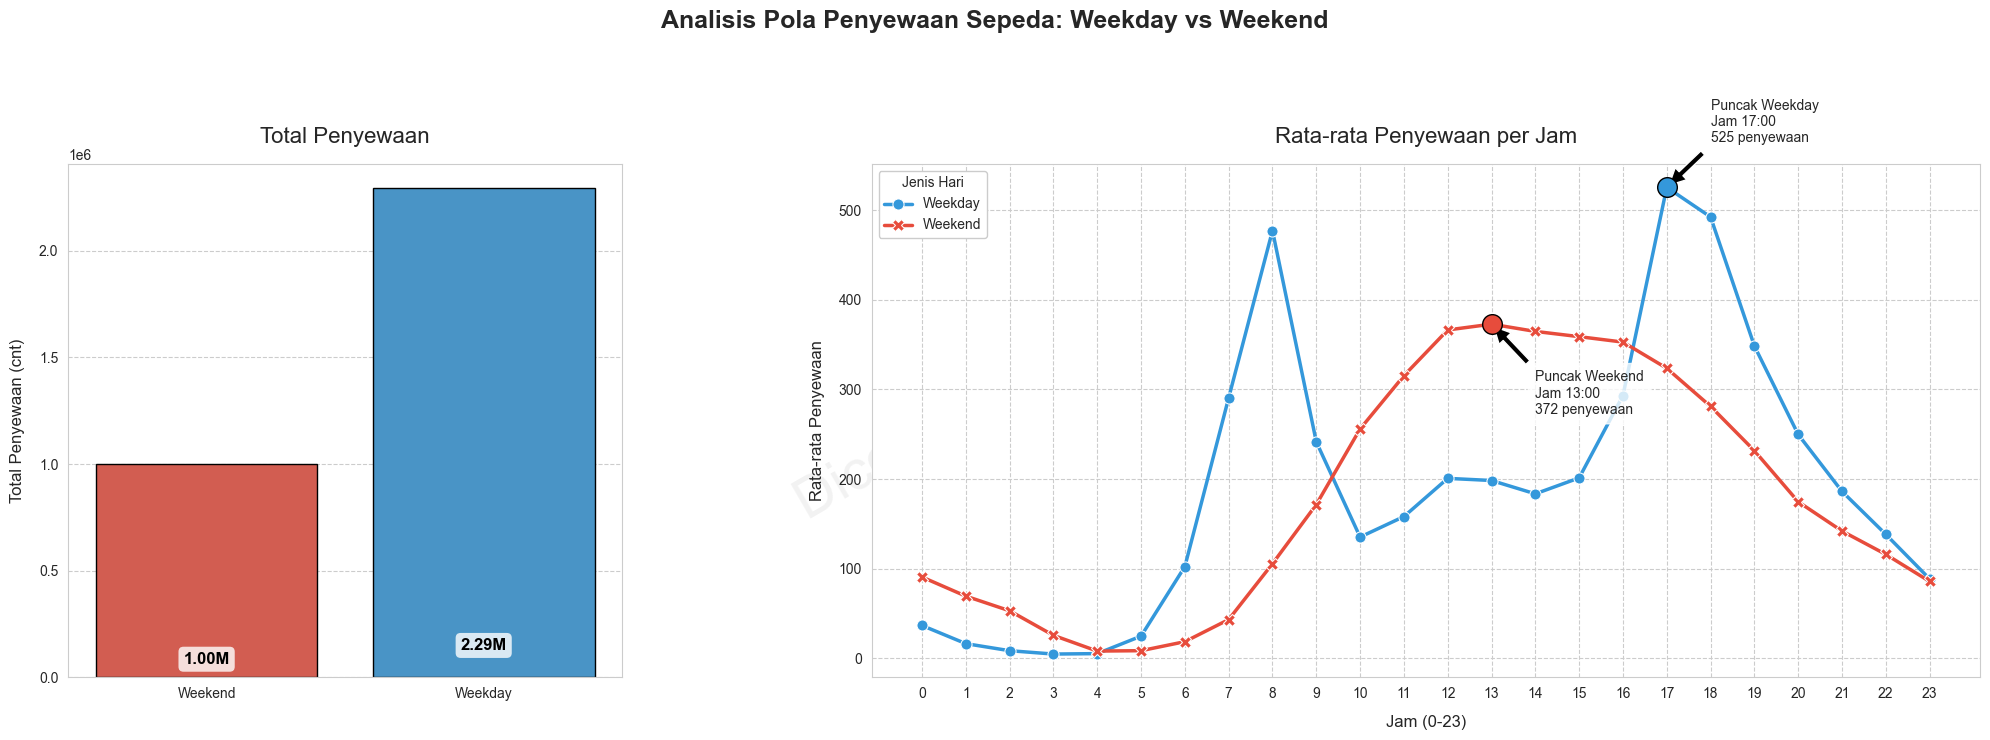

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd  # Pastikan pandas diimport

# Set style untuk visualisasi yang profesional
sns.set_style("whitegrid", {'grid.linestyle': '--', 'grid.alpha': 0.4})
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 12

# Warna yang konsisten - Diubah urutannya
palette_colors = ["#e74c3c", "#3498db"]  # Merah untuk weekend, Biru untuk weekday

# Membuat figure dengan 2 subplot
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 7), gridspec_kw={'width_ratios': [1, 2]})
fig.suptitle('Analisis Pola Penyewaan Sepeda: Weekday vs Weekend', y=1.05, fontsize=18, fontweight='bold')

# ========== CHART 1: Perbandingan Total Penyewaan ==========
weekday_summary = day_df.groupby("workingday")["cnt"].sum().reset_index()
weekday_summary["Hari"] = weekday_summary["workingday"].map({0: "Weekend", 1: "Weekday"})

# Membuat urutan kategori sesuai yang kita inginkan (Weekend dulu baru Weekday)
weekday_summary["Hari"] = pd.Categorical(weekday_summary["Hari"], categories=["Weekend", "Weekday"])

sns.barplot(
    data=weekday_summary,
    x="Hari",
    y="cnt",
    palette=palette_colors,
    ax=ax1,
    edgecolor='black',
    linewidth=1,
    hue="Hari",
    legend=False,
    order=["Weekend", "Weekday"]  # Memastikan urutan sesuai
)

ax1.set_title("Total Penyewaan", pad=15)
ax1.set_xlabel("")
ax1.set_ylabel("Total Penyewaan (cnt)", labelpad=10)

# Format angka dalam jutaan
for i, row in weekday_summary.iterrows():
    ax1.text(
        i, 
        row["cnt"] * 0.05,
        f'{row["cnt"]/1e6:.2f}M',
        ha='center', 
        va='bottom', 
        fontsize=12,
        fontweight='bold',
        color='black',
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round,pad=0.3')
    )

# ========== CHART 2: Pola Penyewaan per Jam ==========
hour_df['day_type'] = hour_df['workingday'].map({1: 'Weekday', 0: 'Weekend'})
hourly_pattern = hour_df.groupby(["hr", "day_type"])["cnt"].mean().reset_index()

sns.lineplot(
    data=hourly_pattern,
    x="hr",
    y="cnt",
    hue="day_type",
    style="day_type",
    markers=True,
    dashes=False,
    markersize=8,
    palette=["#3498db", "#e74c3c"],  # Biru untuk Weekday, Merah untuk Weekend
    ax=ax2,
    linewidth=2.5
)

ax2.set_title("Rata-rata Penyewaan per Jam", pad=15)
ax2.set_xlabel("Jam (0-23)", labelpad=10)
ax2.set_ylabel("Rata-rata Penyewaan", labelpad=10)
ax2.set_xticks(range(0, 24))
ax2.legend(title="Jenis Hari", loc="upper left", framealpha=1)

# Highlight peak hours
weekday_mask = hourly_pattern['day_type'] == 'Weekday'
weekend_mask = hourly_pattern['day_type'] == 'Weekend'

weekday_peak = hourly_pattern[weekday_mask].loc[hourly_pattern[weekday_mask]['cnt'].idxmax()]
weekend_peak = hourly_pattern[weekend_mask].loc[hourly_pattern[weekend_mask]['cnt'].idxmax()]

# Menggunakan iloc[0] untuk menghindari warning
weekday_hr = weekday_peak['hr'].iloc[0] if isinstance(weekday_peak['hr'], pd.Series) else weekday_peak['hr']
weekday_cnt = weekday_peak['cnt'].iloc[0] if isinstance(weekday_peak['cnt'], pd.Series) else weekday_peak['cnt']
weekend_hr = weekend_peak['hr'].iloc[0] if isinstance(weekend_peak['hr'], pd.Series) else weekend_peak['hr']
weekend_cnt = weekend_peak['cnt'].iloc[0] if isinstance(weekend_peak['cnt'], pd.Series) else weekend_peak['cnt']

ax2.scatter(weekday_hr, weekday_cnt, color="#3498db", s=200, zorder=5, edgecolor='black', linewidth=1)
ax2.scatter(weekend_hr, weekend_cnt, color="#e74c3c", s=200, zorder=5, edgecolor='black', linewidth=1)

# Anotasi yang disesuaikan posisinya
ax2.annotate(f'Puncak Weekday\nJam {int(weekday_hr)}:00\n{int(weekday_cnt)} penyewaan',
             xy=(weekday_hr, weekday_cnt),
             xytext=(weekday_hr+1, weekday_cnt+50),  # Digeser lebih ke kiri
             arrowprops=dict(facecolor='black', shrink=0.05),
             bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.8))

ax2.annotate(f'Puncak Weekend\nJam {int(weekend_hr)}:00\n{int(weekend_cnt)} penyewaan',
             xy=(weekend_hr, weekend_cnt),
             xytext=(weekend_hr+1, weekend_cnt-100),
             arrowprops=dict(facecolor='black', shrink=0.05),
             bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.8))

# ========== ELEMEN TAMBAHAN ==========
# Tambahkan watermark
fig.text(0.5, 0.5, 'Dicoding Analytics', 
         fontsize=40, color='gray', alpha=0.1,
         ha='center', va='center', rotation=30, zorder=-1)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(wspace=0.3)  # Jarak antara subplot

plt.show()

**Insight:**

- Hari kerja (weekday) sedikit lebih tinggi total penyewaannya.
- Weekday punya pola dua puncak: jam 8 pagi dan 5 sore (aktivitas kerja).
- Weekend lebih datar, dengan puncak pada tengah hari sampai sore (jam 11–17).

### Pertanyaan 3: Bagaimana perbedaan pola penyewaan sepeda per jam antara kondisi cuaca cerah (clear weather) dan cuaca berkabut (mist/fog)? Apakah terdapat perbedaan signifikan dalam pola penyewaan sepeda pada kedua kondisi cuaca tersebut?


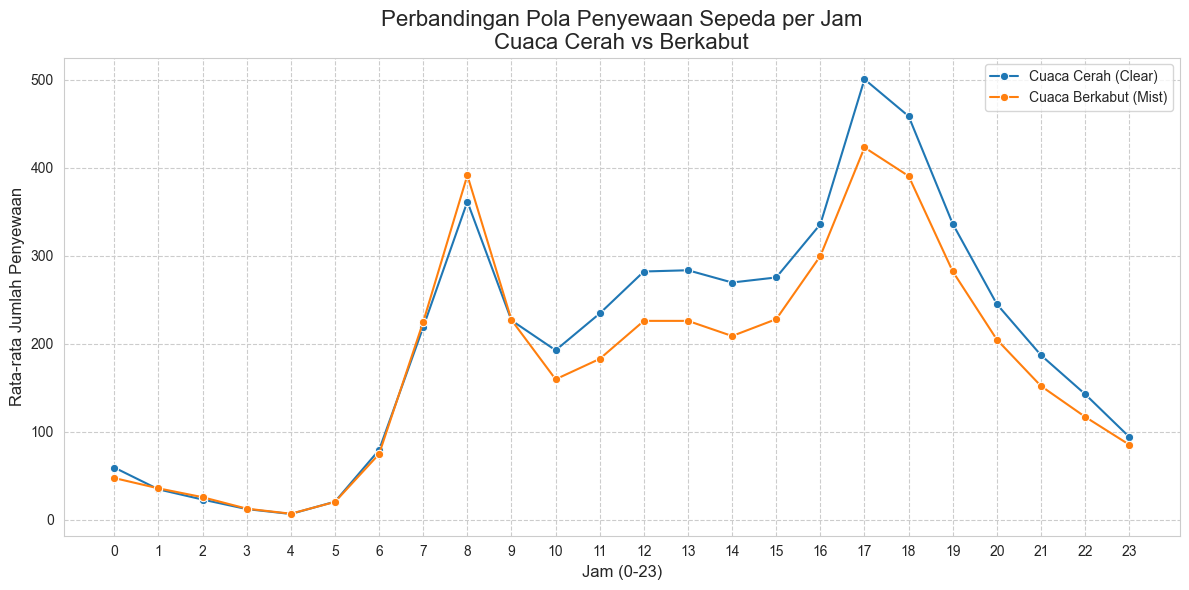

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan dteday sudah dalam datetime
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

# Filter data berdasarkan kondisi cuaca
clear_weather = hour_df[hour_df['weathersit'] == 1]
mist_weather = hour_df[hour_df['weathersit'] == 2]

# Hitung rata-rata penyewaan per jam untuk masing-masing cuaca
avg_clear = clear_weather.groupby('hr')['cnt'].mean().reset_index()
avg_mist = mist_weather.groupby('hr')['cnt'].mean().reset_index()

# Visualisasi
plt.figure(figsize=(12,6))
sns.lineplot(data=avg_clear, x='hr', y='cnt', label='Cuaca Cerah (Clear)', marker='o')
sns.lineplot(data=avg_mist, x='hr', y='cnt', label='Cuaca Berkabut (Mist)', marker='o')

plt.title('Perbandingan Pola Penyewaan Sepeda per Jam\nCuaca Cerah vs Berkabut')
plt.xlabel('Jam (0-23)')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.xticks(range(0, 24))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**Insight:**

- Cuaca cerah (weathersit=1) menghasilkan penyewaan tertinggi.
- Pola jam tetap sama, tapi intensitas jauh menurun saat berkabut (weathersit=2).
- Aktivitas pagi dan sore terlihat lebih rendah saat berkabut.

## Conclusion


Berdasarkan eksplorasi data penyewaan sepeda, beberapa temuan kunci dapat disimpulkan:

1. Tren Musiman:
    - Penyewaan tertinggi terjadi pada musim panas (season 3) dengan rata-rata 5.644 penyewaan/hari, sedangkan terendah pada musim dingin (season 1) dengan rata-rata 2.604 penyewaan/hari.
    - Alasan: Cuaca yang lebih nyaman di musim panas mendorong lebih banyak orang untuk bersepeda.

2. Pola Harian:

    - Hari kerja (Working Day) memiliki total penyewaan lebih tinggi (2.292.410) dibandingkan akhir pekan/libur (1.000.269), tetapi rata-rata harian lebih tinggi di akhir pekan (4.330 vs 4.584).
    - Puncak penyewaan terjadi pada Jumat (weekday 5) dan Kamis (weekday 4), sementara terendah pada Minggu (weekday 0).

3. Pengaruh Cuaca:
    - Cuaca cerah (weathersit 1) mendominasi penyewaan dengan rata-rata 204 penyewaan/jam, sedangkan kondisi hujan/salju (weathersit 3) mengurangi penyewaan hingga 111 penyewaan/jam.
    - Penyewaan tertinggi per jam terjadi pada pukul 17.00–18.00 (jam pulang kerja), sementara terendah pada dini hari (pukul 3.00–4.00).

4. Perbedaan Tahun:
    - Tahun 2012 mengalami peningkatan signifikan dengan rata-rata 5.600 penyewaan/hari (+64% dari 2011), menunjukkan pertumbuhan minat bersepeda.

5. Outlier:
    - Penyewaan tertinggi terjadi pada 15 September 2012 (8.714 sewa), sementara terendah pada 29 Oktober 2012 (22 sewa)—kemungkinan karena cuaca buruk atau hari libur.

Rekomendasi:

1. Optimalkan Ketersediaan Sepeda:
    - Tingkatkan stok sepeda pada musim panas dan jam sibuk (17.00–18.00) untuk memenuhi permintaan.
    - Kurangi distribusi pada dini hari atau hari dengan prediksi cuaca buruk.

2. Strategi Promosi:
    - Diskon atau program loyalitas di hari kerja (khususnya Kamis-Jumat) untuk mendorong penyewaan.
    - Kampanye "Bersepeda di Akhir Pekan" dengan paket keluarga atau grup.

3. Manajemen Operasional:
    - Sistem dinamis pricing berdasarkan musim, cuaca, dan jam sibuk untuk maksimalkan pendapatan.
    - Kolaborasi dengan layanan cuaca untuk memprediksi dampak weathersit pada permintaan.

4. Peningkatan Layanan:
    - Tambahkan stasiun penyewaan di area dengan permintaan tinggi (misalnya dekat kantor pada jam pulang kerja).
    - Sediakan fasilitas darurat (seperti payung atau jas hujan) untuk hari dengan cuaca tidak terduga.


## menyimpan berkas data yang telah dibersihkan

In [81]:
# Gabungkan fitur harian ke hourly
# all_df = hour_df.merge(day_df[['dteday', 'weekday', 'workingday', 'season']], on='dteday', suffixes=('', '_day'))


In [82]:
# weather_labels = {
#     1: 'Clear',
#     2: 'Mist/Fog',
#     3: 'Light Rain/Snow',
#     4: 'Heavy Rain/Snow'
# }
# all_df['weather_label'] = all_df['weathersit'].map(weather_labels)

In [83]:
# all_df['is_weekend'] = all_df['weekday'].apply(lambda x: 1 if x in [0,6] else 0)

In [84]:
# all_df.to_csv("all_data.csv", index=False)